In [ ]:
!pip install -q split-folders

import os
import numpy as np
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
files.upload()


In [ ]:
import os
import json


with open("kaggle.json", "r") as f:
    kaggle_data = json.load(f)


os.environ['KAGGLE_USERNAME'] = kaggle_data['username']
os.environ['KAGGLE_KEY'] = kaggle_data['key']


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!pip install -q kaggle
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip -q gtsrb-german-traffic-sign.zip -d GTSRB


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:05<00:00, 112MB/s] 
100% 612M/612M [00:05<00:00, 116MB/s]


In [ ]:
splitfolders.ratio("GTSRB", output="GTSRB_split", seed=42, ratio=(.8, .1, .1))

Copying files: 25348 files [00:02, 8988.55 files/s] 


In [ ]:
img_height, img_width = 64, 64
batch_size = 32

train_dir = 'GTSRB_split/train'
val_dir = 'GTSRB_split/val'
test_dir = 'GTSRB_split/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_generator.class_indices)

Found 20274 images belonging to 6 classes.
Found 2534 images belonging to 6 classes.
Found 2538 images belonging to 6 classes.


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


634/634 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5006 - loss: 0.7608 - val_accuracy: 0.5000 - val_loss: 0.6966
Epoch 2/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4923 - loss: 0.6990 - val_accuracy: 0.5000 - val_loss: 0.6966
Epoch 3/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5023 - loss: 0.6965 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4942 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5032 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 6/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4997 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.4959 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 8/10
634/634 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4965 - loss: 0.6950 - val_accurac

In [ ]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8363 - loss: 0.6892

 Test Accuracy: 50.00%


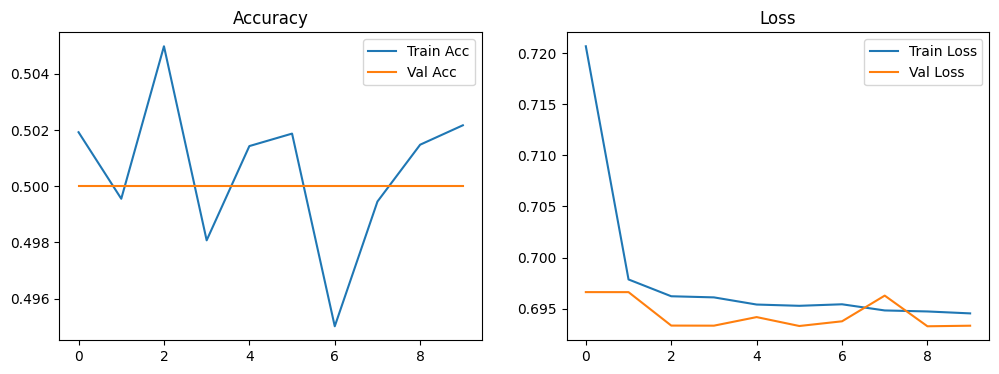

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys()), labels=np.unique(y_true)))

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step

Classification Report:
              precision    recall  f1-score   support

        Meta       0.50      1.00      0.67         5
        Test       0.50      1.00      0.67      1264
       Train       0.00      0.00      0.00         5
        meta       0.00      0.00      0.00      1264

    accuracy                           0.50      2538
   macro avg       0.25      0.50      0.33      2538
weighted avg       0.25      0.50      0.33      2538



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 4, does not match size of target_names, 6
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

In [ ]:
import random
class_names = list(train_generator.class_indices.keys())

def show_predictions():
    x, y = next(test_generator)
    idx = random.randint(0, batch_size - 1)
    image = x[idx]
    true_label = class_names[np.argmax(y[idx])]
    pred_label = class_names[np.argmax(model.predict(np.expand_dims(image, axis=0)))]

    plt.imshow(image)
    plt.title(f"True: {true_label}, Predicted: {pred_label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


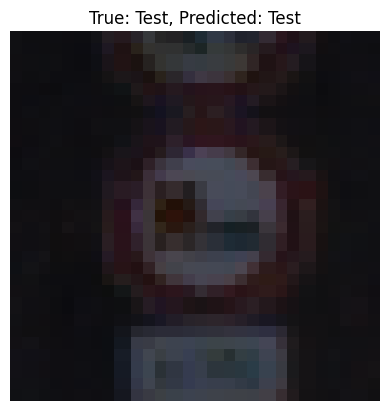

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


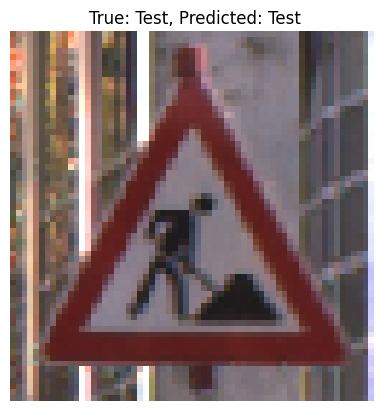

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


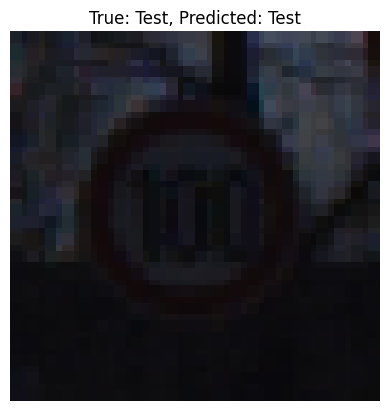

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


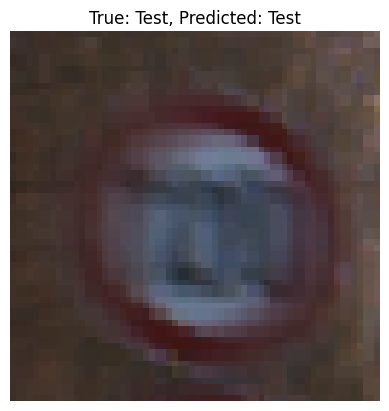

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


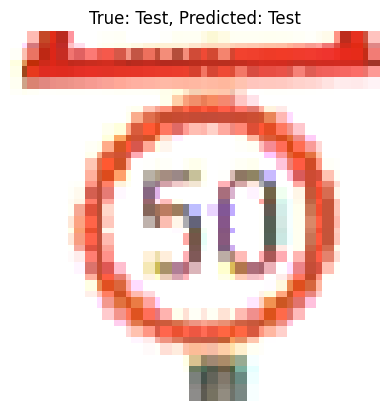

In [ ]:
for _ in range(5):
    show_predictions()

In [ ]:

import gradio as gr
from tensorflow.keras.preprocessing import image


idx_to_label = {v: k for k, v in train_generator.class_indices.items()}

def predict_traffic_sign(img):
    img = img.resize((img_width, img_height))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = idx_to_label[np.argmax(prediction)]
    confidence = np.max(prediction)
    return f"Predicted: {predicted_class} (Confidence: {confidence*100:.2f}%)"

# Launch Gradio Interface
interface = gr.Interface(
    fn=predict_traffic_sign,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🚦 Traffic Sign Recognition",
    description="Upload a traffic sign image to predict its class using a CNN trained on GTSRB data."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b8b115bd695a062c0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:

model.save("traffic_sign_model.h5")


In [ ]:
!rm -f kaggle.json